## Analisis de Datos

## Arboles de Desición

## Javier Alejandro Segura Rodríguez

## Sergio Andres Aponte Suarez

## Daniel Enrique Cantor Verano

## Richard Sneider Mendivelso Romero

## Codigo Curso 202016908_78 

In [61]:
#Importamos las librerias
#Se usar para crear objeto DataFrame
import pandas as pd
#Se usa para usar funciones matematicas
import numpy as np
#se usa para visualización de gráficas con mejor visualización
import seaborn as sns
#se usa para visualización de gráficas
import matplotlib.pyplot as plt
#Se usa para la generación de algoritmo de aprendizaje y evaluación del mismo
from sklearn import metrics
#Se usa para dividir el Dataset en dos partes Entrenamiento y Prueba
from sklearn.model_selection import train_test_split
#Se usa para realizar el entrenamiento del algorito de clasificación
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [6]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
#Cuenta Cantidad de filas y columnas
data.shape

(1599, 12)

In [11]:
#obtener resumen estadistico
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
#Verificamos valores nulos
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

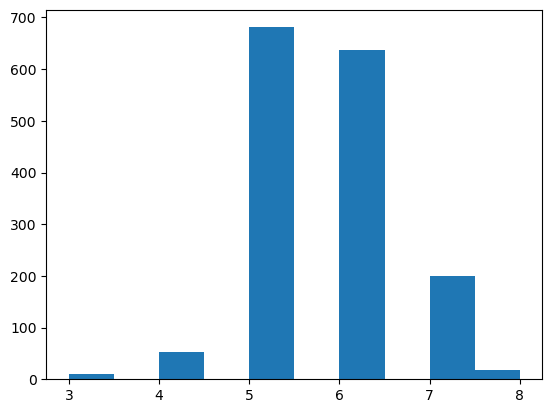

In [15]:
#Generar histograma
plt.hist(data.quality)

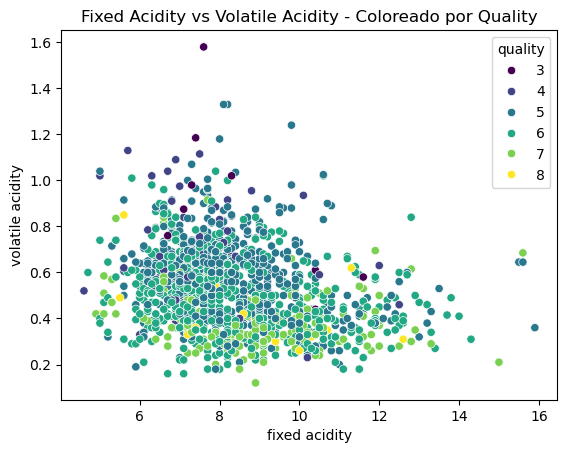

In [147]:
# Scatter plot con color por la variable 'quality'
sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='quality', data=data, palette='viridis')
plt.title('Fixed Acidity vs Volatile Acidity - Coloreado por Quality')
plt.show()

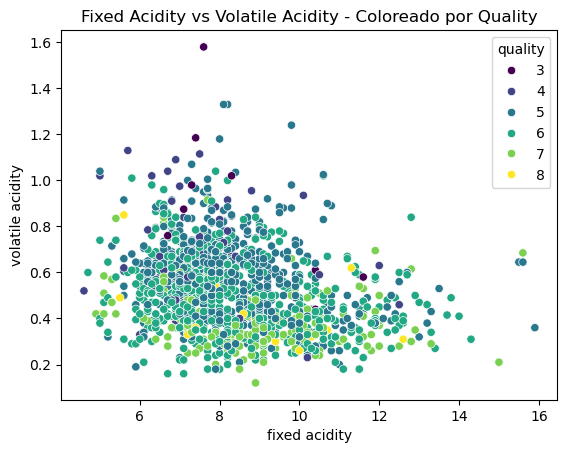

In [147]:
# Scatter plot con color por la variable 'quality'
sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='quality', data=data, palette='viridis')
plt.title('Fixed Acidity vs Volatile Acidity - Coloreado por Quality')
plt.show()

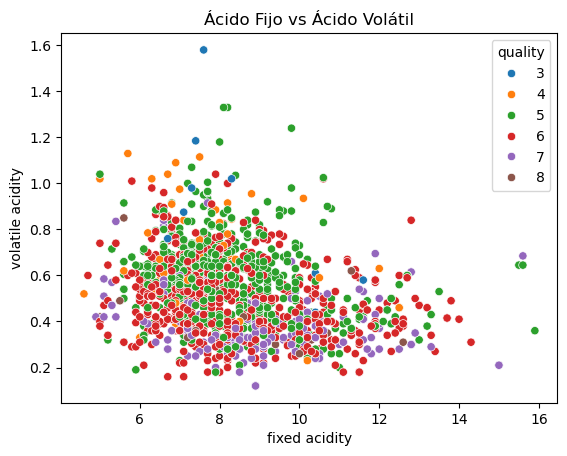

In [149]:
#Aquí podemos ver si la acidez fija y volátil influyen en la calidad del producto.
sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='quality', data=data, palette='tab10')
plt.title('Ácido Fijo vs Ácido Volátil')
plt.show()

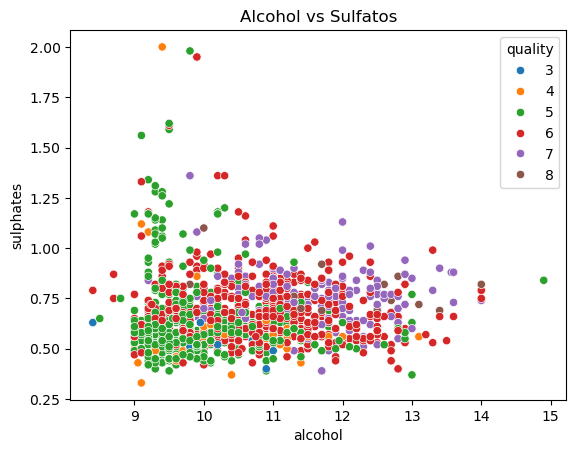

In [150]:
#El contenido de alcohol y los sulfatos son factores importantes que pueden estar relacionados con la calidad. Podemos ver si existe alguna correlación entre estas dos variables
sns.scatterplot(x='alcohol', y='sulphates', hue='quality', data=data, palette='tab10')
plt.title('Alcohol vs Sulfatos')
plt.show()

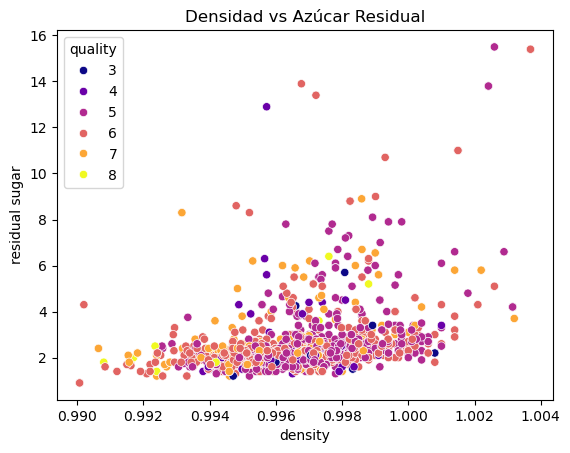

In [153]:
#El contenido de azúcar residual y la densidad del producto podrían estar correlacionados y afectar la calidad.
sns.scatterplot(x='density', y='residual sugar', hue='quality', data=data, palette='plasma')
plt.title('Densidad vs Azúcar Residual')
plt.show()

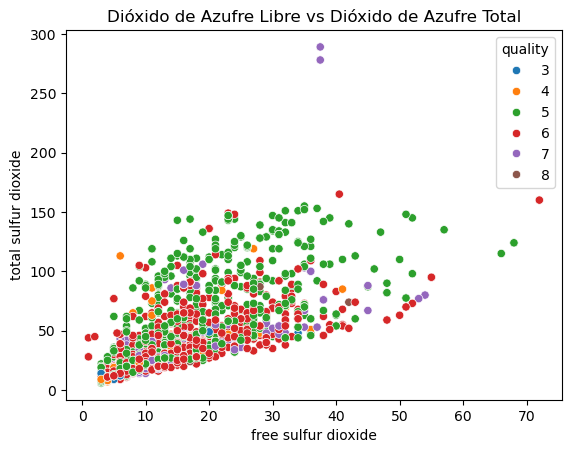

In [155]:
#El dióxido de azufre es un conservante, y puede tener un impacto en la calidad. Aquí podemos visualizar la relación entre ambas formas de dióxido de azufre y la calidad.
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', hue='quality', data=data, palette='tab10')
plt.title('Dióxido de Azufre Libre vs Dióxido de Azufre Total')
plt.show()

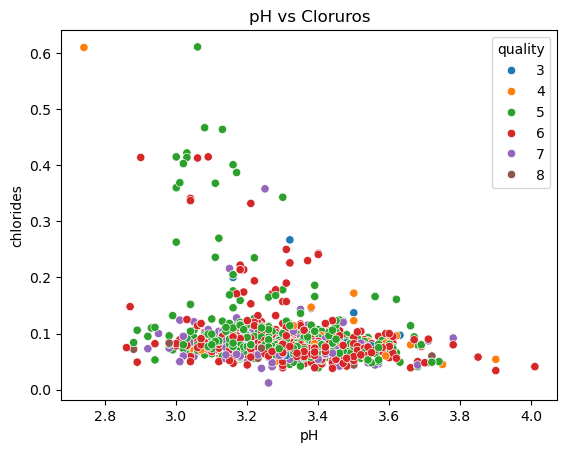

In [157]:
#El nivel de pH y la concentración de cloruros pueden influir en las características químicas del producto, lo que a su vez afecta su calidad.
sns.scatterplot(x='pH', y='chlorides', hue='quality', data=data, palette='tab10')
plt.title('pH vs Cloruros')
plt.show()

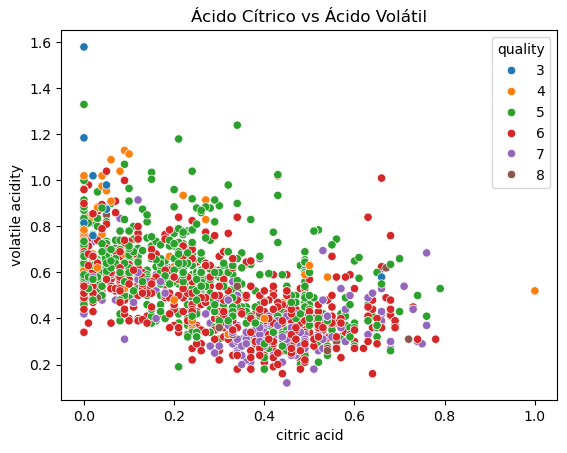

In [159]:
#Ambos tipos de acidez pueden tener un impacto importante en la calidad. Este gráfico te permitirá observar cualquier relación entre los tipos de ácido y la calida
sns.scatterplot(x='citric acid', y='volatile acidity', hue='quality', data=data, palette='tab10')
plt.title('Ácido Cítrico vs Ácido Volátil')
plt.show()

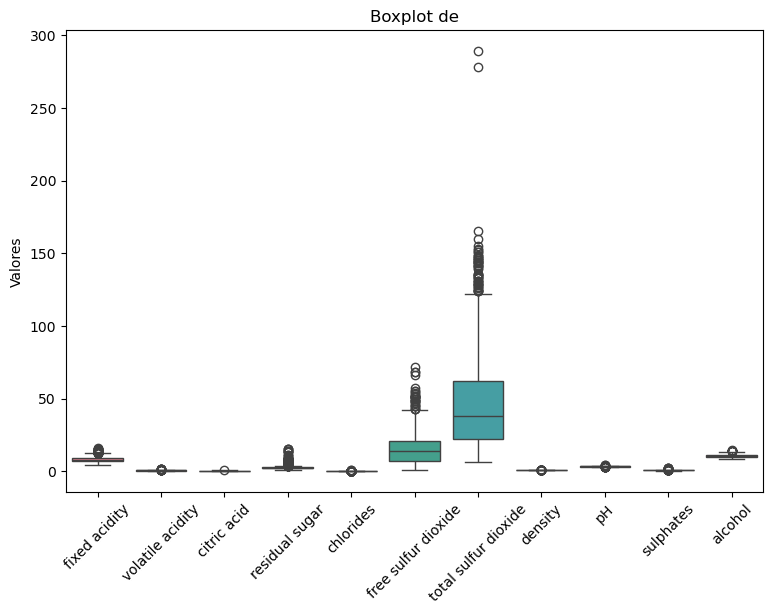

In [17]:
plt.figure(figsize=(9,6))
sns.boxplot(data=data[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
            "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", 
            "alcohol"]])
plt.xticks(rotation=45)
plt.title("Boxplot de")
plt.ylabel("Valores")
palette='tab10'
plt.show()

In [19]:
#separa las columnas entre las variables necesarias para determinar y la variable objetivo
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
            "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", 
            "alcohol"]
target_col = ["quality"]

In [21]:
predictors = data[predictors_col]
target = data[target_col]

In [25]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [27]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [29]:
#Genera correlación entre variables númericas
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


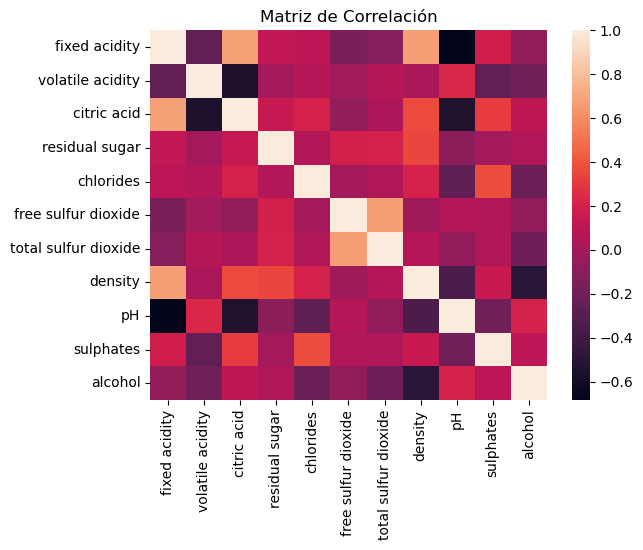

In [31]:
sns.heatmap(corr)
plt.title("Matriz de Correlación")
plt.show()

In [33]:
#Agregar porcentaje de train y test, campo random_state siempre debe llevar informacion
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.25, random_state=0)

In [35]:
#Creación Arbol de decision
tree = DecisionTreeClassifier()

In [37]:
#Entrenar Arbol
arbol = tree.fit(x_train, y_train)

[Text(0.5080366984452351, 0.9761904761904762, 'x[10] <= 10.525\ngini = 0.646\nsamples = 1199\nvalue = [8.0, 39.0, 512.0, 468.0, 159.0, 13.0]'),
 Text(0.23253185914294555, 0.9285714285714286, 'x[9] <= 0.535\ngini = 0.544\nsamples = 744\nvalue = [5, 24, 435, 248, 31, 1]'),
 Text(0.05115511551155116, 0.8809523809523809, 'x[3] <= 9.3\ngini = 0.378\nsamples = 180\nvalue = [2.0, 12.0, 139.0, 26.0, 1.0, 0.0]'),
 Text(0.04785478547854786, 0.8333333333333334, 'x[10] <= 9.533\ngini = 0.367\nsamples = 178\nvalue = [2, 12, 139, 24, 1, 0]'),
 Text(0.019801980198019802, 0.7857142857142857, 'x[10] <= 9.075\ngini = 0.226\nsamples = 88\nvalue = [0, 5, 77, 6, 0, 0]'),
 Text(0.006600660066006601, 0.7380952380952381, 'x[8] <= 3.19\ngini = 0.64\nsamples = 5\nvalue = [0, 2, 2, 1, 0, 0]'),
 Text(0.0033003300330033004, 0.6904761904761905, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.009900990099009901, 0.6904761904761905, 'x[7] <= 0.997\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 0, 1, 0, 0]

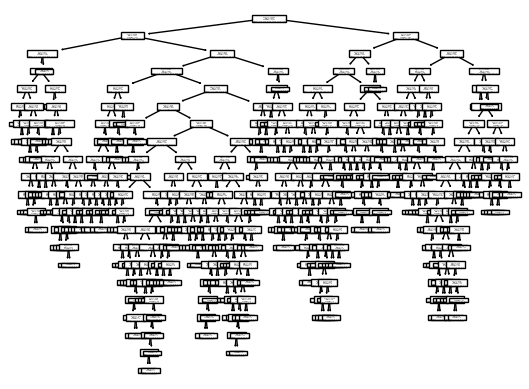

In [39]:
plot_tree(arbol)

In [40]:
#Realizar test
predicciones = arbol.predict(x_test)

In [41]:
predicciones

array([6, 4, 7, 5, 5, 6, 6, 6, 4, 6, 5, 5, 6, 4, 6, 7, 7, 5, 5, 6, 6, 6,
       6, 7, 5, 5, 5, 7, 5, 8, 7, 7, 7, 6, 7, 7, 5, 3, 6, 4, 5, 5, 6, 7,
       6, 5, 5, 6, 5, 8, 5, 6, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 6, 6, 5, 6,
       5, 5, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 7, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 4, 5, 6, 6, 5, 7, 5, 6, 4, 5, 7, 7, 6, 5, 6, 5, 5, 5, 6, 6, 5,
       6, 5, 8, 5, 6, 6, 6, 4, 6, 6, 5, 5, 5, 5, 5, 7, 5, 5, 7, 6, 6, 4,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 8, 6, 5, 5, 6, 7, 6, 6,
       6, 6, 5, 6, 6, 6, 5, 7, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 7, 3, 6,
       7, 7, 7, 5, 5, 7, 6, 6, 6, 6, 5, 5, 5, 7, 6, 7, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 7, 6, 6, 6, 5, 6, 4, 6, 7, 7, 6, 5,
       5, 6, 7, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 7, 6, 5, 6, 7, 6, 5, 6,
       6, 5, 7, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 7, 6, 5, 6,
       4, 5, 5, 5, 5, 7, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 7, 6, 5, 5, 5, 5, 6,

In [45]:
#Examinar la matriz de confunsion
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]),predicciones , rownames=["Actual"],colnames=["Predicciones"])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,1,0,0
4,0,2,6,4,2,0
5,1,9,109,34,15,1
6,2,2,32,116,17,1
7,0,2,5,9,21,3
8,0,0,0,2,2,1


In [71]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6225

In [69]:
precision = precision_score(y_test,predicciones, average="weighted")
precision

0.6415767890965306

In [51]:
recall = recall_score(y_test,predicciones,average = "weighted")
recall

0.6225

In [53]:
f1 = f1_score(y_test,predicciones, average = "weighted")
f1

0.6298920361749771